# Momentum Strategies

# 1. READING - The Momentum Product
This section is not graded, and you do not need to submit your answers. But you are expected to consider these issues and be ready to discuss them.

### 1.1 
What is novel about the AQR Momentum product under construction compared to the various momentum investment products already offered?


<span style="color: blue; text-size:0,85em">

1. mutual fund - retail investors, long only, open end fund
2. Index idea of momentum investment - eligible for mutual fund requirements

</span>

### 1.2 
Name three reasons the momentum investment product will not exactly track the momentum index, (ie. why the strategy will have tracking error.)

To Fama-French index:

<span style="color: blue; text-size:0,85em">

1. AQR’s fund would be long-only, whereas the index (Fama-french UMD) is long-short.
2. The index assumes monthly rebalancing, which may cause huge transaction cost.
3. Fama-French UMD used all listed stocks, whereas AQR’s fund would only use stocks with reasonable market capitalization and liquidity. This is because of “open-end” mutual fund regulation.

To AQR index:
1. quarterly rebalancing and associated transaction costs,
2. how the fund handles boundary stocks,
3. the pace of trade execution,
4. tax considerations, and
5. the inclusion of other return-generating factors

</span>

### 1.3 
When constructing the momentum portfolio, AQR ranks stocks on their returns from month $t-12$ through $t-2$. Why don't they include the $t-1$ return in this ranking?

<span style="color: blue; text-size:0,85em">

It was common to skip the prior month (t-1) when computing past year returns (i., to use t-12 to t-2 returns rather than t-12to t-1 returns), because of evidence in legadeesh (1990) that stocks with high returns last month tend to reverse in the following. 

The winning/losing stocks between $ t-1 $ to $ t $ may show short-term reversal, such that the momentum strategy would be hurt by including return in the ranking.

</span>

# 2. Investigating Momentum

### Data

In this section, we empirically investigate some concerns regarding AQR's new momentum product.
On Canvas, find the data file, `data/momentum_data.xlsx`.

* The first tab contains the momentum factor as an excess return: $\tilde{r}^{\mathrm{mom}}$.
* The second tab contains returns on portfolios corresponding to scored momentum deciles.
  - $r^{\operatorname{mom}(1)}$ denotes the portfolio of stocks in the lowest momentum decile, the "losers" with the lowest past returns.
  - $r^{\operatorname{mom}(10)}$ denotes the portfolio of stocks in the highest momentum decile.
* The third tab gives portfolios sorted by momentum and size.
  - $r^{\text {momsu }}$ denotes the portfolio of small stocks in the top 3 deciles of momentum scores.
  - $r^{\text {momBD }}$ denotes the portfolio of big-stocks in the bottom 3 deciles of momentum scores.

Note that the Fama-French momentum return, $\tilde{r}^{\mathrm{mom}: \mathrm{FF}}$, given in the first tab, is constructed by $\mathrm{FF}$ as,

$$
\tilde{r}^{\mathrm{mom}: \mathrm{FF}}=\frac{1}{2}\left(r^{\mathrm{momBU}}+r^{\mathrm{momSU}}\right)-\frac{1}{2}\left(r^{\mathrm{momBD}}+r^{\mathrm{momSD}}\right)
$$

The Fama-French momentum return

$$\tilde{r}^{mom:FF} = \frac{1}{2} (\tilde{r}^{momBU} + \tilde{r}^{momSU}) − \frac{1}{2} (\tilde{r}^{momBD} + \tilde{r}^{momSD}) $$

In [2]:
# libraries

import pandas as pd 
import numpy as np 
from IPython.display import display

In [9]:
# read data

data_path = 'momentum_data.xlsx'

momentum_excess = pd.read_excel(
    data_path,
    sheet_name='momentum (excess returns)',
    index_col=0
).pipe(lambda df: df.set_index(pd.to_datetime(df.index)))

factors_excess = pd.read_excel(
    data_path,
    sheet_name='factors (excess returns)',
    index_col=0
).pipe(lambda df: df.set_index(pd.to_datetime(df.index)))

deciles = pd.read_excel(
    data_path,
    sheet_name='deciles (total returns)',
    index_col=0
).pipe(lambda df: df.set_index(pd.to_datetime(df.index)))

size_sorts = pd.read_excel(
    data_path,
    sheet_name='size_sorts (total returns)',
    index_col=0
).pipe(lambda df: df.set_index(pd.to_datetime(df.index)))

risk_free = pd.read_excel(
    data_path,
    sheet_name='risk-free rate',
    index_col=0
).pipe(lambda df: df.set_index(pd.to_datetime(df.index)))




for df in (momentum_excess, factors_excess, deciles, size_sorts, risk_free):
    df.index.name = 'date'
    df.columns = df.columns.str.strip()


def styled_preview(df, caption):
    numeric_cols = df.select_dtypes(include='number').columns
    formats = {col: '{:.4f}' for col in numeric_cols}
    return (
        df.head(5)
        .style
        .set_caption(caption)
        .format(formats)
    )


display(styled_preview(momentum_excess, 'Momentum Excess Returns (Top 5)'))
display(styled_preview(factors_excess, 'Factor Excess Returns (Top 5)'))
display(styled_preview(size_sorts, 'Size-Sorted Portfolio Returns (Top 5)'))
display(styled_preview(deciles, 'Decile Portfolio Returns (Top 5)'))
display(styled_preview(risk_free, 'Risk-Free Rate (Top 5)'))


,UMD
date,
1927-01-31 00:00:00,0.0057
1927-02-28 00:00:00,-0.0150
1927-03-31 00:00:00,0.0352
1927-04-30 00:00:00,0.0436
1927-05-31 00:00:00,0.0278


,MKT,SMB,HML
date,,,
1927-01-31 00:00:00,-0.0005,-0.0032,0.0458
1927-02-28 00:00:00,0.0417,0.0007,0.0272
1927-03-31 00:00:00,0.0014,-0.0177,-0.0238
1927-04-30 00:00:00,0.0047,0.0039,0.0065
1927-05-31 00:00:00,0.0545,0.0155,0.0480


,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR
date,,,,,,
1927-01-31 00:00:00,-0.0001,0.0369,0.0050,-0.0040,0.0006,0.0023
1927-02-28 00:00:00,0.0673,0.0635,0.0582,0.0655,0.0398,0.0445
1927-03-31 00:00:00,-0.0315,-0.0314,-0.0199,-0.0364,-0.0018,0.0225
1927-04-30 00:00:00,-0.0070,-0.0046,0.0348,-0.0272,0.0073,0.0181
1927-05-31 00:00:00,0.0250,0.1123,0.0664,0.0550,0.0504,0.0692


,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
date,,,,,,,,,,
1927-01-31 00:00:00,-0.0332,-0.0454,0.0267,-0.0029,-0.0041,0.0093,0.0030,0.0071,-0.0014,-0.0024
1927-02-28 00:00:00,0.0739,0.0601,0.0703,0.0746,0.0434,0.0398,0.0299,0.0320,0.0414,0.0704
1927-03-31 00:00:00,-0.0323,-0.0305,-0.0384,-0.0480,-0.0046,-0.0235,0.0196,0.0049,0.0035,0.0613
1927-04-30 00:00:00,0.0128,-0.0301,-0.0244,0.0043,0.0119,-0.0016,0.0203,-0.0074,0.0181,0.0549
1927-05-31 00:00:00,0.0271,0.0454,0.0597,0.0314,0.0614,0.0593,0.0522,0.0632,0.0819,0.0592


,RF
date,
1927-01-31 00:00:00,0.0025
1927-02-28 00:00:00,0.0026
1927-03-31 00:00:00,0.0030
1927-04-30 00:00:00,0.0025
1927-05-31 00:00:00,0.0030


### 2.1 Is Momentum still profitable?

The excess returns of lucrative trading strategies often disappear once the strategy is well-known. The first widely-cited paper on momentum was published in 1993. Have momentum returns or risk changed since then? The AQR case takes place at the end of 2008. Have momentum returns changed in 2009-2024?

Investigate by filling out the summary statistics below for the full-sample and three sub-samples.

#### (a) 
Using the data provided, fill in Table 1 with the appropriate stats for $\tilde{r}^{\text {mom:FF }}$.

$$
\begin{equation*}
\begin{aligned}
&\text { Table 2: Long-only momentum performance. }\\
&\begin{array}{llllll}
\hline \hline \text { Subsample } \quad \text { mean } \quad \text { vol } & \text { Sharpe } & \text { skewness } & \text { corr. to } \tilde{r}^m & \text { corr. to } \tilde{r}^v \\
\hline \hline & & & & \\
1927-2024 & & & \\
1927-1993 & & & \\
1993-2008 & & & \\
2009-2024 & & & \\
\hline \hline
\end{array}
\end{aligned}
\end{equation*}
$$

In [4]:
momentum_series = momentum_excess['UMD'].dropna()
factor_subset = factors_excess[['MKT', 'HML']].dropna()

periods = {
    '1927-2024': (pd.Timestamp('1927-01-01'), pd.Timestamp('2024-12-31')),
    '1927-1993': (pd.Timestamp('1927-01-01'), pd.Timestamp('1993-12-31')),
    '1993-2008': (pd.Timestamp('1993-01-01'), pd.Timestamp('2008-12-31')),
    '2009-2024': (pd.Timestamp('2009-01-01'), pd.Timestamp('2024-12-31')),
}

rows = []
for label, (start, end) in periods.items():
    sample = pd.concat(
        [momentum_series, factor_subset],
        axis=1
    ).loc[start:end]

    mean_ann = sample['UMD'].mean() * 12
    vol_ann = sample['UMD'].std(ddof=1) * np.sqrt(12)
    sharpe_ann = mean_ann / vol_ann

    rows.append(
        {
            'Subsample': label,
            'mean': mean_ann,
            'vol': vol_ann,
            'Sharpe': sharpe_ann,
            'skewness': sample['UMD'].skew(),
            'corr_to_r_m': sample['UMD'].corr(sample['MKT']),
            'corr_to_r_v': sample['UMD'].corr(sample['HML']),
        }
    )

momentum_table1 = (
    pd.DataFrame(rows)
    .set_index('Subsample')
    .reindex(periods.keys())
)

style_ann = {
    'mean': '{:.1%}',
    'vol': '{:.1%}',
    'Sharpe': '{:.1%}',
    'skewness': '{:.1%}',
    'corr_to_r_m': '{:.1%}',
    'corr_to_r_v': '{:.1%}',
}

display(
    momentum_table1.style
    .set_caption('Table 1: UMD Momentum Statistics (Annualized Mean/Vol/Sharpe)')
    .format(style_ann)
)


,mean,vol,Sharpe,skewness,corr_to_r_m,corr_to_r_v
Subsample,,,,,,
1927-2024,7.4%,16.3%,45.4%,-306.7%,-34.9%,-41.0%
1927-1993,8.8%,16.1%,54.9%,-391.1%,-36.7%,-50.1%
1993-2008,10.9%,17.2%,63.7%,-63.1%,-23.1%,-9.2%
2009-2024,-1.3%,15.8%,-8.2%,-269.2%,-37.0%,-31.9%


#### (b)
Has momentum changed much over time, as seen through these subsample statistics?

<span style="color: blue; text-size:0,85em">_

- Momentum returns were relatively stable from 1927 to 2008.
- Since 2009, momentum has delivered slightly negative returns.
- Overall, performance hasn’t varied much across most periods, except for the post-2009 decline.

</span>


#### (c) 

Does this data support AQR's argument that momentum is an important piece of the ideal portfolio? What if mean returns to momentum are in actuality near zero due to transaction costs - would there still be evidence here that momentum is valuable?

<span style="color: blue; text-size:0,85em">

- Momentum was profitable in 2008, when AQR considered launching its momentum product.
- It has consistently shown low correlation with both market and value factors.
- This low correlation makes momentum a strong diversifier, even if its average return is near zero.

</span>

### 2.2. Whether a long-only implementation of momentum is valuable.

Construct your own long-only implementation:

$$\tilde{r}^{momU:FF} = \frac{1}{2} (\tilde{r}^{momBU} + \tilde{r}^{momSU}) − r^f $$

Note that this is following the FF approach of treating big and small stocks separately. This would be very similar to a scaled version of,

$$\tilde{r}^{momU} = \frac{1}{3} (\tilde{r}^{mom(8)} + \tilde{r}^{mom(9)} + \tilde{r}^{mom(10)}) − r^f $$

For the question below, use the FF-style $\tilde{r}^{momU:FF}_t$

#### (a) 

Fill out Table 2 for the data in the period 1994-2024.

$$
\begin{equation*}
\begin{aligned}
&\text { Table 2: Long-only momentum performance. }\\
&\begin{array}{llllll}
\hline \hline \text { 1994-2024 } & \text { mean } \quad \text { vol } & \text { Sharpe } & \text { skew } & \text { corr. to } \tilde{r}^m & \text { corr. to } \tilde{r}^v \\
\hline \hline \text { Long-and-short, }\left(\tilde{r}^{\text {mom:FF }}\right) & & & \\
\text { Long-only }\left(\tilde{r}^{\text {momU:FF }}\right) & & & \\
\hline \hline
\end{array}
\end{aligned}
\end{equation*}
$$

In [5]:
analysis_window = (pd.Timestamp('1994-01-01'), pd.Timestamp('2024-12-31'))
start, end = analysis_window

mom_long_short = momentum_excess['UMD']

mom_bu = size_sorts['BIG HiPRIOR']
mom_su = size_sorts['SMALL HiPRIOR']
rf_series = risk_free['RF']

mom_long_only_total = 0.5 * (mom_bu + mom_su)

mom_long_only = (mom_long_only_total - rf_series).rename('momU_FF')

stats_inputs = {
    'Long-and-short (UMD)': mom_long_short,
    'Long-only (momU:FF)': mom_long_only,
}

rows = []
for label, series in stats_inputs.items():
    sample = pd.concat(
        [series, factor_subset],
        axis=1
    ).loc[start:end].dropna()

    mean_ann = sample.iloc[:, 0].mean() * 12
    vol_ann = sample.iloc[:, 0].std(ddof=1) * np.sqrt(12)
    sharpe_ann = mean_ann / vol_ann if vol_ann > 0 else np.nan

    rows.append(
        {
            'Portfolio': label,
            'mean': mean_ann,
            'vol': vol_ann,
            'Sharpe': sharpe_ann,
            'skew': sample.iloc[:, 0].skew(),
            'corr_to_r_m': sample.iloc[:, 0].corr(sample['MKT']),
            'corr_to_r_v': sample.iloc[:, 0].corr(sample['HML']),
        }
    )

momentum_table2 = pd.DataFrame(rows).set_index('Portfolio')

style_table2 = {
    'mean': '{:.1%}',
    'vol': '{:.1%}',
    'Sharpe': '{:.1%}',
    'skew': '{:.1%}',
    'corr_to_r_m': '{:.1%}',
    'corr_to_r_v': '{:.1%}',
}

display(
    momentum_table2.style
    .set_caption('Table 2: Momentum Performance (1994-2024)')
    .format(style_table2)
)


,mean,vol,Sharpe,skew,corr_to_r_m,corr_to_r_v
Portfolio,,,,,,
Long-and-short (UMD),4.3%,16.7%,25.7%,-146.1%,-31.1%,-21.0%
Long-only (momU:FF),11.6%,17.8%,65.2%,-44.2%,90.4%,-11.6%


#### (b)  
Is long-only momentum as attractive as long-short momentum with respect to mean, volatil-ity, and Sharpe Ratio?

<span style="color: blue; text-size:0,85em">

Yes, long-only has even higher return and similar vol, while Sharpe is also higher.

</span>

#### (c) 
Is long-only momentum as diversifying as long-short momentum with respect to market and value premia?

<span style="color: blue; text-size:0,85em">

Less diversifying. 90.4% of market corr. Long-short portfolio has -31.1% of market corr as long short helps cancel out the majority of corr to market, but long only did not diversify at all.

</span>

#### (d) 
Show a plot of the cumulative product of $1+\tilde{r}^{\text {mom:FF }}$ and $1+\tilde{r}^{\text {momU:FF }}$ over the 1994-2024 subsample. $^2$

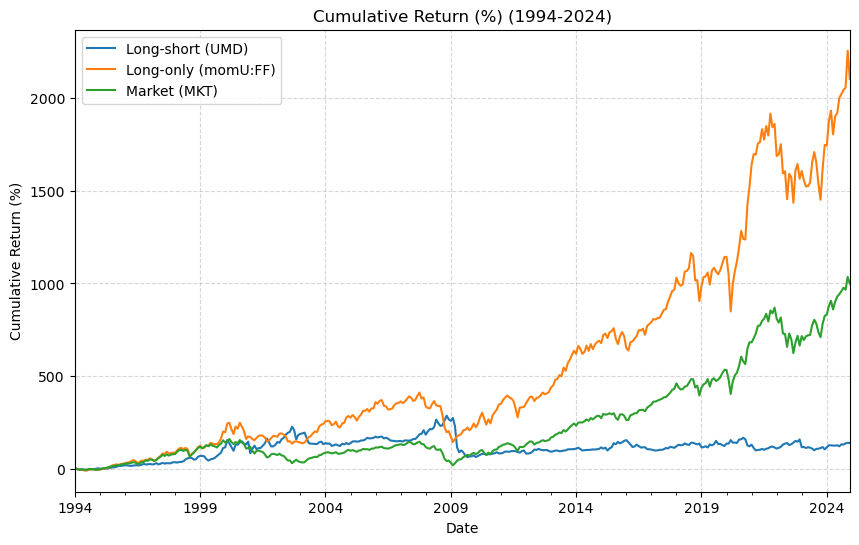

In [7]:
# 2.2(d) Cumulative performance plot


aligned_momentum = pd.concat(
    {
        'Long-short (UMD)': mom_long_short,
        'Long-only (momU:FF)': mom_long_only,
        'Market (MKT)': factors_excess['MKT'],
    },
    axis=1
).loc[start:end].dropna()

if aligned_momentum.abs().max().max() > 1:
    cum_growth = (1 + aligned_momentum / 100).cumprod()
else:
    cum_growth = (1 + aligned_momentum).cumprod()

cum_return_pct = (cum_growth - 1) * 100

ax = cum_return_pct.plot(figsize=(10, 6))
ax.set_title('Cumulative Return (%) (1994-2024)')
ax.set_ylabel('Cumulative Return (%)')
ax.set_xlabel('Date')
ax.grid(True, linestyle='--', alpha=0.5)


### 2.3. 
Is momentum just data mining, or is it a robust strategy?

Assess how sensitive the threshold for the “winners” and “losers” is in the results. Specifically, we compare three constructions:

- long the top 1 decile and short the bottom 1 deciles:

$$ \tilde{r}^{momD1} = r^{mom(10)} - r^{mom(1)}$$

- long the top 3 deciles and short the bottom 3 deciles:

$$ 
\begin{aligned}
\tilde{r}^{momD3} &= \frac{1}{3}(r^{mom(8)} + r^{mom(9)} + r^{mom(10)}) - \frac{1}{3} (r^{mom(3)} + r^{mom(2)} + r^{mom(1)})\\
&= \frac{1}{3}\sum_{k = 8}^{10} r^{mom(k)} - \frac{1}{3}\sum_{k = 1}^{3} r^{mom(k)} 
\end{aligned}$$

- long the top 5 deciles and short the bottom 5 decile:

$$ \tilde{r}^{momD5} = \frac{1}{5}\sum_{k = 6}^{10} r^{mom(k)} - \frac{1}{5}\sum_{k = 1}^{5} r^{mom(k)} $$

In [14]:
# Construct momentum decile spread series

momD1 = deciles['Hi PRIOR'] - deciles['Lo PRIOR']
momD3 = deciles[['PRIOR 8', 'PRIOR 9', 'Hi PRIOR']].mean(axis=1) - deciles[['Lo PRIOR', 'PRIOR 2', 'PRIOR 3']].mean(axis=1)
momD5 = deciles[['PRIOR 6', 'PRIOR 7', 'PRIOR 8', 'PRIOR 9', 'Hi PRIOR']].mean(axis=1) - deciles[['Lo PRIOR', 'PRIOR 2', 'PRIOR 3', 'PRIOR 4', 'PRIOR 5']].mean(axis=1)

momentum_spreads = pd.concat(
    {
        'momD1': momD1,
        'momD3': momD3,
        'momD5': momD5,
    },
    axis=1
).dropna(how='all')

display(momentum_spreads.head(5))

,momD1,momD3,momD5
date,,,
1927-01-31,0.0308,0.018400,0.01490
1927-02-28,-0.0035,-0.020167,-0.02176
1927-03-31,0.0936,0.056967,0.04392
1927-04-30,0.0421,0.035767,0.02196
1927-05-31,0.0321,0.024033,0.01816


#### (a) 
Compare all three constructions, (in the full-sample period,) by filling out the stats in the table below for the period 1994-2023.

$$
\begin{equation}
\begin{aligned}
&\text { Table 3: Robustness of momentum construction. }\\
&\begin{array}{lllllll}
\hline \hline \text { 1994-2025 } \quad \text { mean } & \text { vol } & \text { Sharpe } & \text { skewness } & \text { corr. to } \tilde{r}^m & \text { corr. to } \tilde{r}^v \\
\hline \hline \tilde{r}^{\text {momD1 }} & & & & & \\
\tilde{r}^{\text {momD3 }} & & & & \\
\tilde{r}^{\text {momD5 }} & & & & \\
\hline \hline
\end{array}
\end{aligned}
\end{equation}
$$

In [ ]:
# Table 3 statistics for alternative momentum constructions (1994 onward)

analysis_window_robust = (pd.Timestamp('1994-01-01'), momentum_spreads.index.max())
start_alt, end_alt = analysis_window_robust

robust_inputs = {
    'momD1': momentum_spreads['momD1'],
    'momD3': momentum_spreads['momD3'],
    'momD5': momentum_spreads['momD5'],
}

rows = []
for label, series in robust_inputs.items():
    sample = pd.concat([series, factor_subset], axis=1).loc[start_alt:end_alt].dropna()

    mean_ann = sample.iloc[:, 0].mean() * 12
    vol_ann = sample.iloc[:, 0].std(ddof=1) * np.sqrt(12)
    sharpe_ann = mean_ann / vol_ann if vol_ann > 0 else np.nan

    rows.append(
        {
            'Portfolio': label,
            'mean': mean_ann,
            'vol': vol_ann,
            'Sharpe': sharpe_ann,
            'skewness': sample.iloc[:, 0].skew(),
            'corr_to_r_m': sample.iloc[:, 0].corr(sample['MKT']),
            'corr_to_r_v': sample.iloc[:, 0].corr(sample['HML']),
        }
    )

momentum_table3 = pd.DataFrame(rows).set_index('Portfolio')

style_table3 = {
    'mean': '{:.1%}',
    'vol': '{:.1%}',
    'Sharpe': '{:.1%}',
    'skewness': '{:.1%}',
    'corr_to_r_m': '{:.1%}',
    'corr_to_r_v': '{:.1%}',
}

display(
    momentum_table3.style
    .set_caption('Table 3: Robustness of Momentum Construction (1994 onward)')
    .format(style_table3)
)



,mean,vol,Sharpe,skewness,corr_to_r_m,corr_to_r_v
Portfolio,,,,,,
momD1,7.4%,29.9%,24.8%,-127.1%,-32.0%,-24.6%
momD3,2.7%,19.3%,13.9%,-132.0%,-35.4%,-22.1%
momD5,1.6%,13.4%,11.6%,-140.8%,-34.9%,-21.4%


#### (b) 
Do the tradeoffs between the 1-decile, 3-decile, and 5-decile constructions line up with the theoretical tradeoffs we discussed in the lecture?

<span style="color: blue; text-size:0,85em">

Trade the extreme “winners” and “losers” yield higer returns but comes with higher vol.

</span>

#### (c) 
Should AQR's retail product consider using a 1-decile or 5-decile construction?

<span style="color: blue; text-size:0,85em">

1 decile. 
Trade the extreme “winners” and “losers”
▶ Small autocorrelation multiplied by large returns gives sizeable return in the following period.
▶ By additionally shorting the biggest “losers”, we can magnify this further.

</span>

#### (d) 
Does $\tilde{r}^{\text {momD3 }}$ have similar stats to the Fama-French construction in (1). Recall that construction is also a 3-decile, long-short construction, but it is segmented for small and large stocks. Compare the middle row of Table 3 with the top row of Table 2.

<span style="color: blue; text-size:0,85em">

They are similar, but Fama-French construction has higher return and lower volatility, resulting with higher sharpe ratio. Fama-French construction allows balance between small and large stocks, whereas top 3 deciles construction could be biased towards either small or large stocks.

</span>

### 2.4. 
Does implementing momentum require trading lots of small stocks-- thus causing even larger trading costs?

For regulatory and liquidity reasons, AQR is particularly interested in using larger stocks for their momentum baskets. (Though they will launch one product that focuses on medium-sized stocks.)

Use the data provided on both small-stock “winners”, $r^{momSU}$, and small-stock “losers”, $r^{momSD}$, to construct a small-stock momentum portfolio,

$$ r^{momS}_t = r^{momSU}_t - r^{momSD}_t $$

Similarly, use the data provided to construct a big-stock momentum portfolio,

$$ r^{momB}_t = r^{momBU}_t − r^{momBD}_t $$

#### (a) 
Fill out Table 4 over the sample 1994-2024.

$$
\begin{equation*}
\begin{aligned}
&\text { Table 4: Momentum of small and big stocks. }\\
&\begin{array}{llllll}
\hline \hline \text { 1994-2024 } & \text { mean } & \text { vol } & \text { Sharpe } & \text { skewness } & \text { corr. to } \tilde{r}[m] \\
\hline \hline \text { All stocks, } \tilde{r}^{\text {mom:FF }} & & & & \\
\text { Small stocks } r_t^{\text {mom } S} & & & \\
\text { Large stocks } r_t^{\text {mom } B} & & & \\
\hline
\end{array}
\end{aligned}
\end{equation*}
$$

In [18]:
# Table 4 statistics: small vs big stock momentum (1994 onward)

analysis_window_size = (pd.Timestamp('1994-01-01'), size_sorts.index.max())
start_size, end_size = analysis_window_size

mom_all = momentum_excess['UMD']
mom_small = size_sorts['SMALL HiPRIOR'] - size_sorts['SMALL LoPRIOR']
mom_big = size_sorts['BIG HiPRIOR'] - size_sorts['BIG LoPRIOR']

size_inputs = {
    'All stocks (UMD)': mom_all,
    'Small stocks (momS)': mom_small,
    'Large stocks (momB)': mom_big,
}

rows = []
for label, series in size_inputs.items():
    sample = pd.concat([series, factor_subset], axis=1).loc[start_size:end_size].dropna()

    mean_ann = sample.iloc[:, 0].mean() * 12
    vol_ann = sample.iloc[:, 0].std(ddof=1) * np.sqrt(12)
    sharpe_ann = mean_ann / vol_ann if vol_ann > 0 else np.nan

    rows.append(
        {
            'Portfolio': label,
            'mean': mean_ann,
            'vol': vol_ann,
            'Sharpe': sharpe_ann,
            'skewness': sample.iloc[:, 0].skew(),
            'corr_to_r_m': sample.iloc[:, 0].corr(sample['MKT']),
        }
    )

momentum_table4 = pd.DataFrame(rows).set_index('Portfolio')

style_table4 = {
    'mean': '{:.1%}',
    'vol': '{:.1%}',
    'Sharpe': '{:.1%}',
    'skewness': '{:.1%}',
    'corr_to_r_m': '{:.1%}',
}

display(
    momentum_table4.style
    .set_caption('Table 4: Momentum by Size (1994 onward)')
    .format(style_table4)
)



,mean,vol,Sharpe,skewness,corr_to_r_m
Portfolio,,,,,
All stocks (UMD),4.1%,16.6%,24.9%,-145.2%,-30.6%
Small stocks (momS),6.2%,16.8%,36.9%,-181.3%,-30.9%
Large stocks (momB),2.1%,18.2%,11.4%,-85.5%,-27.3%


#### (b) 
Is the attractiveness of the momentum strategy mostly driven by the small stocks? That is, does a momentum strategy in large stocks still deliver excess returns at comparable risk?

<span style="color: blue; text-size:0,85em">

Small stocks in the momentum stratege has higher return and higer Sharpe. So large stocks deliver lower return.

</span>

### 2.5. 
In conclusion, what is your assessment of the AQR retail product? Is it capturing the important features of the Fama-French construction of momentum? Would you suggest any modifications?

<span style="color: blue; text-size:0,85em">

AQR’s retail product uses a long only approach which leads to a higher correlation with the Market and has less diversification benefits compared to the benchmark index or Fama-French momentum factor.

Quarterly rebalancing might make the portfolio diverge from the benchmark index and Fama-French momentum factor.

</span>